<a href="https://colab.research.google.com/github/arkeodev/demistify_deep_learning_applications/blob/main/Positional_Embedding/positional_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\begin{array}{c}
\text{$\Large There\ are\ no\ eternal\ facts,\ as\ there\ are\ no\ absolute\ truths.$} \\
{\text{{$\small Friedrich\ Nietzsche$}}} \\
\end{array}
$$

# Positional Encodings in Transformers

## Introduction

Transformers have revolutionized the field of natural language processing (NLP) since their introduction in the seminal paper "Attention is All You Need" by Vaswani et al. in 2017. Unlike previous models that processed input sequentially (like RNNs and LSTMs), Transformers process all parts of the input data in parallel. This architectural innovation significantly improves efficiency and has enabled breakthroughs in a wide range of NLP tasks, including but not limited to machine translation, text summarization, and sentiment analysis.


One of the core challenges in developing the Transformer model was how to handle the sequential nature of language without relying on sequential processing. The solution was positional encodings. These are vectors added to the input embeddings to provide information about the position of tokens in a sequence. Since the Transformer processes all tokens simultaneously, it inherently lacks a sense of order or position for these tokens. Positional encodings solve this problem by embedding each token with information about its position in the sequence, enabling the model to consider the order of words when it's essential for understanding context and meaning.


The importance of positional encodings in Transformers cannot be overstated. They enable the model to make sense of sequence order, which is crucial for many aspects of language understanding and generation. Without positional encodings, Transformers would not be able to differentiate between "the dog bites the man" and "the man bites the dog" — two sentences with identical words but markedly different meanings. In essence, positional encodings allow Transformers to maintain their parallel processing advantage while still respecting the sequential nature of language, making them a cornerstone of the model's success in NLP.

## The Role of Positional Encodings

Transformers process data through a mechanism known as self-attention, a novel approach that allows each token in the input sequence to interact with every other token directly. This is a departure from earlier sequence processing models, which processed tokens in a linear or sequential order, often leading to inefficiencies and limitations in capturing long-range dependencies.

### How Transformers Process Data



At the core of the Transformer's data processing capability is the self-attention mechanism. This mechanism computes the relevance of all other tokens to a given token within the same sequence, allowing the model to weigh the importance of each token when processing any part of the input. Essentially, for each token, the Transformer computes a set of scores indicating how much focus to place on other parts of the input sequence. These scores are then used to produce a weighted sum of all input tokens, which serves as the input for subsequent layers.

The Transformer architecture consists of an encoder and a decoder, each comprising multiple layers. The encoder maps an input sequence to a sequence of continuous representations, which the decoder then uses to generate an output sequence. Each layer in both the encoder and decoder contains a self-attention mechanism and a feed-forward neural network, allowing the model to handle complex dependencies and relationships in the data.

![Transformers Architecture](https://raw.githubusercontent.com/arkeodev/demistify_deep_learning_applications/main/Positional_Embedding/images/transformers_architecture.png#:~:text=Copy-,permalink,-%E2%8C%98)


### The Need for Positional Information



While the self-attention mechanism allows Transformers to consider all parts of the input simultaneously, it is, by nature, order-agnostic. This characteristic means that without additional information, the model cannot distinguish between sequences where the order of tokens varies, even though the tokens themselves remain the same. Order is crucial in natural language, where the sequence of words can dramatically alter meaning, syntax, and semantics.

![Positional Embeddings Addition](https://raw.githubusercontent.com/arkeodev/demistify_deep_learning_applications/main/Positional_Embedding/images/positional_embedding_adding.png#:~:text=Copy-,permalink,-%E2%8C%98)

### Injecting Sequence Order with Positional Encodings

Let's refine the example to better illustrate the significance of positional encodings in Transformers and include a basic Python code implementation to showcase the difference in output with and without positional encodings.

#### Example


For this example, let's use a simplified scenario to calculate the attention mechanism with Q, K, V vectors and include positional encodings. We'll compare:

1. **Without positional encoding**: "I read books" vs. "books read I" should produce identical outputs.
2. **With positional encoding**: The outputs should differ, demonstrating the model's sensitivity to word order.


First, we define a basic setup and function to compute the attention mechanism output:

In [15]:
import numpy as np

def simple_attention(Q, K, V):
    """
    Simplified attention calculation.
    Q: Queries
    K: Keys
    V: Values
    """
    attention_scores = np.dot(Q, K.T)
    attention_output = np.dot(attention_scores, V)
    return attention_output

# Word embeddings
embeddings = {
    'I': np.array([1, 0]),
    'read': np.array([0, 1]),
    'books': np.array([1, 1])
}

# Positional encodings for each position in a 3-word sentence
positional_encodings = {
    0: np.array([0, 0]),  # PE for position 1
    1: np.array([0.1, 0.1]),  # PE for position 2
    2: np.array([0.2, 0.2])   # PE for position 3
}

Now, we calculate attention outputs for "I read books" without and with positional encodings:

In [16]:
# Without positional encoding
sentence_1 = ['I', 'read', 'books']
Q_K_V = np.array([embeddings[word] for word in sentence_1])

print(f"Without positional encoding (I read books): \n{simple_attention(Q_K_V, Q_K_V, Q_K_V)}\n\n")

# With positional encoding
Q_K_V_pe = np.array([embeddings[word] + positional_encodings[i] for i, word in enumerate(sentence_1)])

print(f"With positional encoding (I read books): \n{simple_attention(Q_K_V_pe, Q_K_V_pe, Q_K_V_pe)}\n")

Without positional encoding (I read books): 
[[2 1]
 [1 2]
 [3 3]]


With positional encoding (I read books): 
[[2.45 1.55]
 [1.95 3.07]
 [4.8  5.04]]



Next, we repeat for "books read I":

In [17]:
# Without positional encoding
sentence_2 = ['books', 'read', 'I']
Q_K_V_2 = np.array([embeddings[word] for word in sentence_2])

print(f"Without positional encoding (books read I):\n {simple_attention(Q_K_V_2, Q_K_V_2, Q_K_V_2)}\n\n")

# With positional encoding
Q_K_V_pe_2 = np.array([embeddings[word] + positional_encodings[i] for i, word in enumerate(sentence_2)])

print(f"With positional encoding (books read I): \n{simple_attention(Q_K_V_pe_2, Q_K_V_pe_2, Q_K_V_pe_2)}\n")

Without positional encoding (books read I):
 [[3 3]
 [1 2]
 [2 1]]


With positional encoding (books read I): 
[[3.8  3.6 ]
 [1.73 2.61]
 [3.21 2.07]]



- **Without positional encoding**, the attention outputs for "I read books" and "books read I" should be the same, as the model cannot differentiate between the positions of the words in the sequence.
- **With positional encoding**, the outputs should differ, reflecting the model's ability to consider the order of words, thus providing different context and meaning to the sentences.

This example will demonstrate the critical role of positional encodings in enabling Transformers to understand sequence order, which is essential for accurately interpreting and generating language.

## Positional Encoding Methods

There are several alternatives for implementing positional embeddings, each with its own advantages and use cases. Here's a brief overview of the different alternatives:

- Sinusoidal Positional Encodings: Proposed in the original Transformer model, these encodings use sine and cosine functions of different frequencies to encode the position of tokens in the sequence. This method allows for potentially infinite sequences because the function values are computed and do not need to be stored. It's often preferred for its simplicity and the fact that it can handle sequences of any length without requiring retraining for different sequence lengths.

- Learned Positional Embeddings: Unlike sinusoidal encodings, learned positional embeddings are parameters that the model learns during training, similar to learning the weights of the neural network. This method can potentially adapt better to specific tasks because it is learned from data. However, it is limited to the maximum sequence length seen during training, and extending it to longer sequences might require interpolation or additional training.

- Relative Positional Encodings: Introduced to address some limitations of absolute positional encodings, relative positional encodings focus on the relative positions between tokens in the sequence. This can be particularly useful in tasks where the relative positioning of elements is more important than their absolute position in the sequence. It's a more complex approach but can yield better performance in certain applications.

- ALiBi (Attention with Linear Biases): A recent approach that introduces biases based on token distances in the self-attention mechanism, allowing the model to scale to longer sequences without the need for positional embeddings. This method simplifies handling sequence lengths not seen during training and can be easily integrated with existing models.

- Rotary Positional Embeddings (RoPE): Integrates positional information directly into the self-attention mechanism by rotating the embeddings of the tokens based on their positions. This method preserves the model's ability to understand relative positions and distances between tokens and can be particularly effective in tasks requiring fine-grained position sensitivity.

&nbsp;

**Which is preferred?**

The choice of positional embedding depends on the specific requirements of the task, the nature of the data, and the model architecture. Sinusoidal positional encodings are popular for their simplicity and effectiveness in many scenarios, making them a common choice for general-purpose Transformer models. Learned positional embeddings are often preferred when the model needs to capture complex positional relationships specific to the training data. Relative positional encodings, ALiBi, and RoPE are more specialized choices that can offer advantages in particular scenarios, such as when dealing with very long sequences or requiring intricate understanding of token relationships.

Here, we'll look at in more detail Sinusodial, ALiBi (Attention with Linear Biases) and Rotary Positional Embeddings (RoPE) solutions.

## 1. Sinusodial Positional Encodings



### Sine and Cosine Functions in Positional Encodings



The original Transformer model uses sine and cosine functions to generate positional encodings. These functions were chosen because they have several properties that are beneficial for this task:

1. **Periodicity**: Sine and cosine functions are periodic, which helps the model to generalize across different positions by providing a repeating pattern that the model can learn from.
2. **Different Frequencies**: By varying the frequency of the sine and cosine functions, each position can have a unique encoding. Yet, due to the periodic nature of these functions, similar positions (e.g., position 1 and position 101) can have encodings that the model can recognize as being related.
3. **Scalability**: These functions allow for encoding positions for arbitrarily long sequences, a feature not easily achieved with fixed learned positional embeddings.

The formula for positional encodings in the Transformer model uses both sine and cosine functions, alternating across the dimensions of the positional encoding vector. The encoding for a given position $(pos)$ and dimension $(i)$ is defined as:

$$
PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)
$$

$$
PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)
$$

Here, $(pos)$ is the position of the token in the sequence, $(i)$ is the dimension, and $(d_{model})$ is the dimensionality of the model's embeddings. The factor $(10000^{2i/d_{model}})$ scales down the argument to the sine and cosine functions as $(i)$ increases. This ensures that for each subsequent dimension, the wavelength of the sine and cosine functions increases, allowing the model to easily learn to attend to tokens at varying distances from each other. The use of both sine and cosine functions ensures that each dimension of the positional encoding carries unique information, with even dimensions using sine and odd dimensions using cosine.

This approach allows the positional encodings to provide detailed information about the token positions in a way that is easily interpretable by the model, facilitating the understanding of sequence order and enabling better performance on tasks that require an awareness of sequence structure.

**Example**

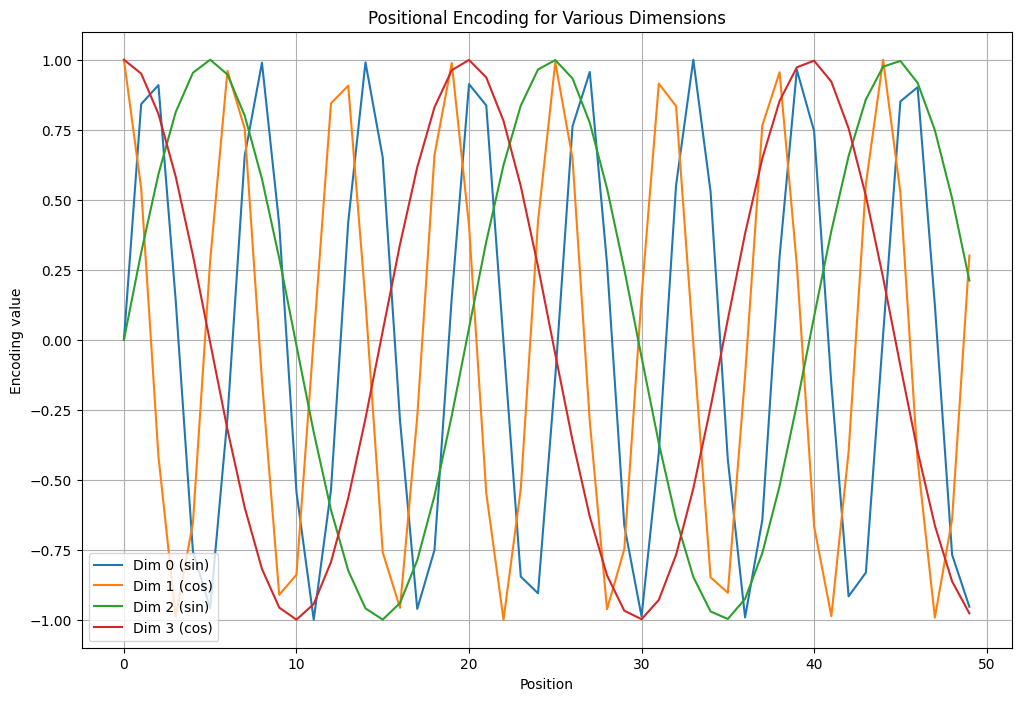

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(pos, d_model):
    """
    Generates the positional encoding for a given position and model dimension.

    Parameters:
    - pos: Position of the token in the sequence.
    - d_model: The dimensionality of the model's embeddings.

    Returns:
    - A numpy array representing the positional encoding for the given position.
    """
    # Initialize the encoding
    encoding = np.zeros((d_model,))

    # Generate the positional encoding using sine and cosine functions
    for i in range(d_model):
        div_term = np.power(10000, (2 * (i // 2)) / d_model)
        if i % 2 == 0:
            encoding[i] = np.sin(pos / div_term)
        else:
            encoding[i] = np.cos(pos / div_term)

    return encoding

# Generate positional encodings for the first 50 positions
positions = np.arange(50)
d_model = 16  # Dimensionality of the model's embeddings
pos_encodings = np.array([positional_encoding(pos, d_model) for pos in positions])

# Plot the positional encodings for some dimensions
plt.figure(figsize=(12, 8))
plt.plot(positions, pos_encodings[:, 0], label='Dim 0 (sin)')
plt.plot(positions, pos_encodings[:, 1], label='Dim 1 (cos)')
plt.plot(positions, pos_encodings[:, 2], label='Dim 2 (sin)')
plt.plot(positions, pos_encodings[:, 3], label='Dim 3 (cos)')
plt.xlabel('Position')
plt.ylabel('Encoding value')
plt.title('Positional Encoding for Various Dimensions')
plt.legend()
plt.grid(True)
plt.show()

The plot above illustrates the positional encoding values for the first four dimensions (0 to 3) across the first 50 positions in a sequence, using a model embedding dimensionality of 16. Here's what we observe:

- **Dimensions 0 and 2 (sin)**: These dimensions use the sine function for encoding. You can see the periodic nature of the sine function, where the encoding value oscillates between -1 and 1. The frequency of oscillation increases with the dimension number, as seen by comparing Dimension 0 and Dimension 2.
- **Dimensions 1 and 3 (cos)**: These dimensions use the cosine function. Similar to the sine function, the cosine function also oscillates between -1 and 1. The phase shift of the cosine function compared to the sine function is evident, with Dimension 1 starting at 1 (the maximum value for the cosine function) when the position is 0.

This variation in the periodic patterns across dimensions allows the model to differentiate between positions in the sequence. By incorporating both sine and cosine functions across dimensions, the Transformer model can capture a rich and detailed signal of the sequence order, which is crucial for tasks that depend on understanding the relationships and structures within sequences.

The alternating sine and cosine functions across dimensions ensure that each position in the sequence gets a unique encoding. Consequently, the model can interpret and utilize this detailed information about token positions to enhance its understanding of sequence order, thereby improving its performance on tasks that require an awareness of sequence structure.

## 2. Rotary Positional Embeddings (RoPE)

Rotary Positional Embeddings (RoPE) integrate positional information into the self-attention mechanism of Transformer models by applying a rotation to the token embeddings based on their positions. This approach allows the model to capture and utilize relative positions and distances between tokens in the sequence. The core mathematical concept behind RoPE is the use of rotation matrices to modify the embeddings, which can encode the position of each token in a way that preserves the notion of distance and direction in the embedding space.

The rotation in RoPE is applied through a rotation matrix, which is a fundamental concept in linear algebra used to rotate vectors in a given space. For a 2D space, a rotation matrix \(R\) that rotates a vector by an angle $(\theta)$ is given by:

$$
R(\theta) = \begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{pmatrix}
$$

In the context of RoPE, each dimension pair in the embeddings is treated as a complex number or a 2D vector, and a rotation is applied based on the token's position. The angle of rotation $(\theta)$ is dependent on the position, allowing the model to encode positional information directly into the embeddings.

For a higher-dimensional embedding space, rotations are applied to each dimension pair, effectively treating the high-dimensional space as composed of multiple 2D planes.



**Example**

Let's consider a simplified example where we apply RoPE to a small embedding vector to demonstrate the concept. We'll rotate the embeddings for two positions to show how the rotation encodes positional information.

First, we'll define a function to create the rotation matrix and apply it to an embedding vector. Then, we'll visualize the effect of applying different rotations based on the position.

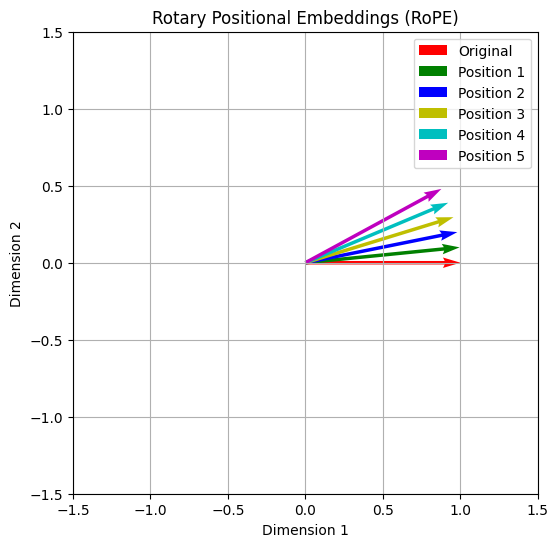

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def get_rotation_matrix(angle):
    """
    Generates a rotation matrix for a given angle.

    Parameters:
    - angle: The angle of rotation in radians.

    Returns:
    - A 2x2 numpy array representing the rotation matrix.
    """
    return np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])

def apply_rope(embedding, position, angle_per_position=0.1):
    """
    Applies Rotary Positional Embedding to a given embedding vector based on its position.

    Parameters:
    - embedding: The original embedding vector (2D for simplicity).
    - position: The position of the token.
    - angle_per_position: The angle increase per position.

    Returns:
    - The rotated embedding vector.
    """
    angle = position * angle_per_position
    rotation_matrix = get_rotation_matrix(angle)
    return np.dot(rotation_matrix, embedding)

# Original embedding vector (for demonstration, in 2D)
embedding = np.array([1, 0])

# Apply RoPE for two positions
embedding_pos_1 = apply_rope(embedding, position=1)
embedding_pos_2 = apply_rope(embedding, position=2)
embedding_pos_3 = apply_rope(embedding, position=3)
embedding_pos_4 = apply_rope(embedding, position=4)
embedding_pos_5 = apply_rope(embedding, position=5)

# Plotting
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, embedding[0], embedding[1], angles='xy', scale_units='xy', scale=1, color="r", label="Original")
plt.quiver(0, 0, embedding_pos_1[0], embedding_pos_1[1], angles='xy', scale_units='xy', scale=1, color="g", label="Position 1")
plt.quiver(0, 0, embedding_pos_2[0], embedding_pos_2[1], angles='xy', scale_units='xy', scale=1, color="b", label="Position 2")
plt.quiver(0, 0, embedding_pos_3[0], embedding_pos_3[1], angles='xy', scale_units='xy', scale=1, color="y", label="Position 3")
plt.quiver(0, 0, embedding_pos_4[0], embedding_pos_4[1], angles='xy', scale_units='xy', scale=1, color="c", label="Position 4")
plt.quiver(0, 0, embedding_pos_5[0], embedding_pos_5[1], angles='xy', scale_units='xy', scale=1, color="m", label="Position 5")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Rotary Positional Embeddings (RoPE)')
plt.legend()
plt.grid(True)
plt.show()

This code applies a basic RoPE concept to an embedding vector, showing how the position of a token influences the direction of its embedding vector through rotation.

The plot visualizes the effect of applying Rotary Positional Embeddings (RoPE) to an original embedding vector in a 2D space, for simplicity. Remember that in practice, RoPE operates on high-dimensional embedding vectors within Transformer models, but this 2D visualization helps illustrate the concept.

- The original embedding vector is shown in red, pointing along the x-axis. We then apply RoPE to rotate this vector based on its position, with the following results:

- The green vector represents the embedding after applying RoPE for a token at position 1. You can see that the vector has been rotated slightly from its original position.
- The blue vector represents the embedding after applying RoPE for a token at position 2. The rotation is more pronounced compared to the green vector, indicating a further position in the sequence.
- and it continues with the other positions.

This visualization illustrates that, the angle of rotation increases with the token's position, allowing the model to capture and utilize the relative positions and distances between tokens.

This mechanism is particularly useful for tasks requiring a fine-grained understanding of sequence structure and relationships, as it preserves the model's ability to interpret relative positioning directly through the embeddings.

## 3. ALiBi (Attention with Linear Biases)

The ALiBi (Attention with Linear Biases) method introduces a linearly scaled bias to the self-attention mechanism in Transformer models. This approach is designed to address the scalability issues with traditional positional embeddings by directly incorporating a bias that reflects the relative distances between tokens. The key mathematical concept behind ALiBi is to modify the attention scores based on the relative positions of tokens, thereby allowing the model to implicitly learn positional dependencies without the need for explicit positional embeddings.

In a Transformer model, the self-attention mechanism calculates attention scores based on the query $(Q)$, key $(K)$, and value $(V)$ matrices. The attention score between two tokens at positions $(i)$ and $(j)$ is typically computed as the dot product of their respective query and key vectors, followed by a softmax operation.

ALiBi modifies this process by introducing a bias term to the attention scores that is linear with respect to the distance between the tokens:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}} + B\right)V
$$

Here, $(B)$ is a bias matrix where each element $(B_{ij})$ represents the bias for the attention score between tokens at positions $(i)$ and $(j)$. The bias is defined as:

$$
B_{ij} = -\alpha \cdot |i - j|
$$

where $(\alpha)$ is a scaling factor that controls the strength of the bias, and $(|i - j|)$ represents the absolute distance between the positions of the two tokens. This linear bias discourages the model from attending to tokens that are far apart, thereby implicitly encoding positional information.


**Example**

Let's demonstrate how ALiBi might influence attention scores with a simplified example. We'll create a small bias matrix for a sequence of tokens and visualize how the bias affects attention, assuming a constant $(\alpha)$ for simplicity.

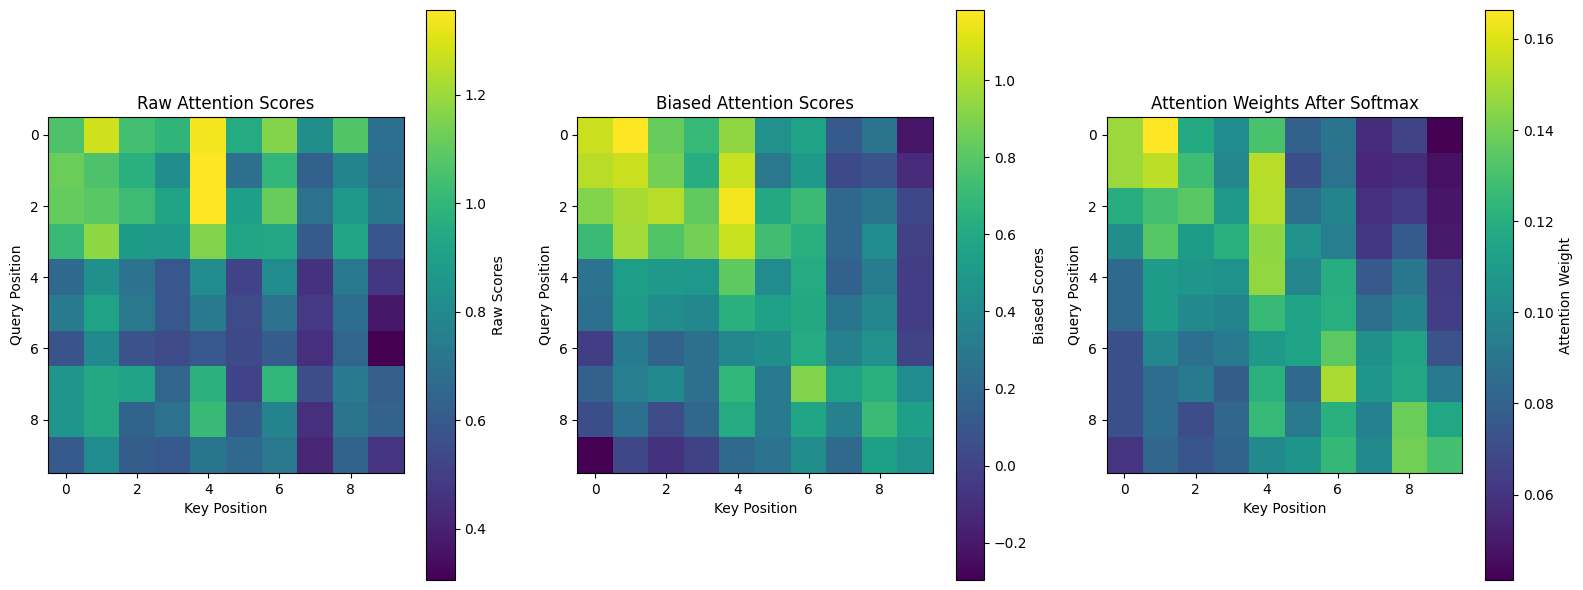

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    """Compute softmax values for each set of scores in x."""
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

seq_length = 10
alpha = 0.1
np.random.seed(0)  # For reproducibility

# Simulating input sequence representation by creating mock Q and K matrices
Q = np.random.rand(seq_length, seq_length)  # Mock query matrix
K = np.random.rand(seq_length, seq_length)  # Mock key matrix

# Compute raw attention scores (without considering the bias yet)
raw_scores = np.dot(Q, K.T) / np.sqrt(seq_length)

# Create the ALiBi bias matrix
i, j = np.arange(seq_length), np.arange(seq_length)
bias_matrix = -alpha * np.abs(i[:, None] - j)

# Apply the bias to the raw scores
biased_scores = raw_scores + bias_matrix

# Apply softmax to simulate attention weights
attention_weights = softmax(biased_scores)

# Plotting
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(raw_scores, cmap='viridis')
plt.colorbar(label='Raw Scores')
plt.xlabel('Key Position')
plt.ylabel('Query Position')
plt.title('Raw Attention Scores')

plt.subplot(1, 3, 2)
plt.imshow(biased_scores, cmap='viridis')
plt.colorbar(label='Biased Scores')
plt.xlabel('Key Position')
plt.ylabel('Query Position')
plt.title('Biased Attention Scores')

plt.subplot(1, 3, 3)
plt.imshow(attention_weights, cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.xlabel('Key Position')
plt.ylabel('Query Position')
plt.title('Attention Weights After Softmax')

plt.tight_layout()
plt.show()

This code snippet creates and visualizes the bias matrix used in ALiBi for a sequence of 10 tokens. The bias linearly decreases with distance between positions, reflecting how ALiBi introduces a penalty for attention between distant tokens. Let's execute this to see the bias matrix visualization.

This example demonstrates the following steps:

1. Simulating Input Sequence Representation: We generate mock Q and K matrices to represent the queries and keys derived from an input sequence.
2 Computing Raw Scores: The raw attention scores are calculated by taking the dot product of Q and K matrices, simulating part of the self-attention mechanism.
3. Applying ALiBi Bias: We add the ALiBi bias to the raw scores, introducing a linear bias based on token distances to influence attention distribution.
4. Computing Attention Weights: Finally, we apply softmax to the biased scores to obtain the attention weights, demonstrating how the ALiBi bias shapes the attention mechanism's focus on different parts of the input sequence.

The visualizations help to understand the effect of ALiBi biases on the attention mechanism, showing the transition from raw attention scores, through biased attention scores, to the final attention weights after applying softmax. This illustrates how closer tokens are preferentially attended to, while attention to farther tokens is diminished, in line with ALiBi's goal to incorporate positional information directly into the attention mechanism.

By using such a bias, ALiBi allows Transformer models to handle sequences of varying lengths more flexibly, including lengths not seen during training, without the need for predefined positional embeddings.

## Conclusion

Despite their benefits, positional encodings also present challenges, such as determining the optimal way to encode position for different tasks or managing sequences longer than those seen during training. These challenges, however, also represent opportunities for further research and innovation in developing more sophisticated methods of encoding and utilizing positional information.

## References

- Transformers Architecture: [Attention Is All You Need](https://arxiv.org/abs/1706.03762)
- RoPE (Rotary Position Encoding): [RoFormer: Enhanced Transformer with Rotary Position Embedding](https://arxiv.org/abs/2104.09864)
- ALiBi (Attention with Linear Biases): [Train short, test long: Attention with linear biases enables input length extrapolation](https://arxiv.org/pdf/2108.12409.pdf)